# Langevin Dynamics in a Double-Well Potential

This notebook illustrates Langevin diffusion with drift induced by a potential.
We focus on a 1D double-well potential and compare empirical marginals to the
Boltzmann–Gibbs stationary distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('figs', exist_ok=True)
np.random.seed(0)

## Potential and Langevin SDE

We consider the double-well potential
$$
U(x) = \tfrac14(x^2-1)^2.
$$
The Langevin SDE is
$$
dX_t = -U'(X_t)dt + \sqrt{2D}dW_t.
$$

In [2]:
def U(x):
    return 0.25*(x**2 - 1)**2

def dU(x):
    return x*(x**2 - 1)


## Euler–Maruyama Simulation

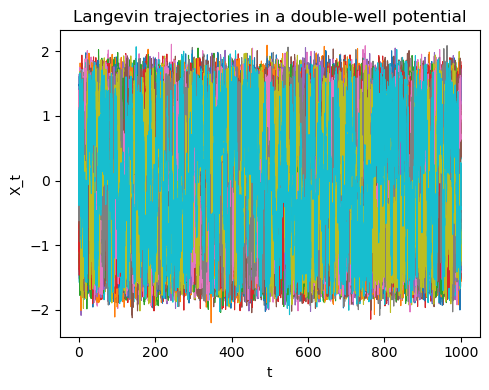

In [5]:
D = 0.3
dt = 1e-3
T = 1000.0
N = int(T/dt)

num_paths = 30
paths = np.zeros((num_paths, N))

for i in range(num_paths):
    x = 0.0
    for k in range(N):
        x = x - dU(x)*dt + np.sqrt(2*D*dt)*np.random.randn()
        paths[i,k] = x

t = np.linspace(0, T, N)

plt.figure(figsize=(5,4))
for i in range(num_paths):
    plt.plot(t, paths[i], lw=0.8)
plt.xlabel('t')
plt.ylabel('X_t')
plt.title('Langevin trajectories in a double-well potential')
plt.tight_layout()
plt.savefig('figs/Langevin_paths.png', dpi=150)
plt.show()

## Empirical Marginal vs Boltzmann Distribution

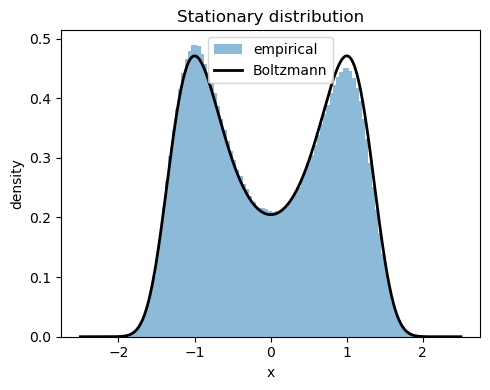

In [6]:
samples = paths[:, int(0.5*N):].reshape(-1)

xgrid = np.linspace(-2.5, 2.5, 400)
boltz = np.exp(-U(xgrid)/D)
boltz /= np.trapz(boltz, xgrid)

plt.figure(figsize=(5,4))
plt.hist(samples, bins=100, density=True, alpha=0.5, label='empirical')
plt.plot(xgrid, boltz, 'k-', lw=2, label='Boltzmann')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Stationary distribution')
plt.legend()
plt.tight_layout()
plt.savefig('figs/Langevin_stationary.png', dpi=150)
plt.show()

## Summary

Langevin dynamics samples from the Boltzmann distribution associated with the
potential $U(x)$. Barrier crossings depend on the noise level $D$.